# Assignment 2 - Predictive Process Monitoring

*Due: Friday, 15 December, 2023 at 14:00 CET*

In this assignment, you will learn to use several regression models to predict the process remaining time. In addition, you will also show that you can evaluate their performance and discuss the results in a report. The learning objectives of this assignment are: 

- use the data aggregation, feature encoding, and data transformation techniques to preprocess event data
- use the regression models to predict the remaining time of ongoing cases. 
- perform cross validation and fine-tune the model parameters of each algorithm
- calculate model performance (e.g., MAE, MSE, RMSE, R^2, etc.)
- design experiments to compare the performance of algorithms
- reflect on the difference between different models


This assignment includes two algorithms: Regression Tree (or Random Forest Regression) and kNN regressor. Following a similar structure as the first assignment, your first task is to perform data exploration and data cleaning. 
In Task 2, you will perform two trace encoding techniques (covered during Lecture 07). 
In Task 3-4, you will use the two algorithms to learn regression models to forecast the remaining time of each case after each event. 
In Task 5, you will compare the algorithms and evaluate their results. 

Please note that Task 3 and 4 have the following structure:
1. First, find the library (e.g., sklearn examples) and try out the algorithm by simply training the model on the training data (do not consider any parameters or cross validation just yet); 
2. Train the model with the training data by using cross validation and find the best parameter setting for the parameters of interest;
3. Report the average MAE, MSE, RMSE, and R^2 of all validation sets;
4. Finally, test the optimal model that has the best fitting parameters on your held-out test data, and report its MAE, MSE, RMSE, and R2. 

Note that, in Task 5, you will need all the calculated MAE, MSE, RMSE, and R^2 on both encoded data from previous tasks. Make sure you save these to a list or dictionary so you can easily evaluate and compare the results. 



## Task 1: Exploring the data set



### Data set: Sepsis

Import the file *sepsis.csv* to load the Sepsis data set. This real-life event log contains events of sepsis cases from a hospital. Sepsis is a life threatening condition typically caused by an infection. One case represents a patient's pathway through the treatment process. The events were recorded by the ERP (Enterprise Resource Planning) system of the hospital. The original data set contains about 1000 cases with in total 15,000 events that were recorded for 16 different activities. Moreover, 39 data attributes are recorded, e.g., the group responsible for the activity, the results of tests and information from checklists. 

Additional information about the data can be found :
- https://data.4tu.nl/articles/dataset/Sepsis_Cases_-_Event_Log/12707639
- http://ceur-ws.org/Vol-1859/bpmds-08-paper.pdf




In [1]:
def get_latex(df):
    print(
        df.applymap(lambda x: round(x, 2) if isinstance(x, float) else x)
        .to_latex(index=False)
        .replace("\\toprule\n", "\hline\n")
        .replace("\midrule\n", "\hline\n")
        .replace("\\bottomrule\n", "\hline\n")
    )

In [2]:
# Initialise environment
import pandas as pd

RANDOM_SEED = 42

# Import data
data = pd.read_csv("../data/sepsis.csv", sep=";")

In [3]:
TIMESTAMP_FEATURES = ["Complete Timestamp", "month", "weekday", "hour"]
DURATION_FEATURES = ["remtime", "elapsed", "duration"]
IDENTIFIER_FEATURES = ["Case ID", "org:group"]
CATEGORICAL_FEATURES = ["Activity", "Diagnose"]
BOOLEAN_FEATURES = [
    "DiagnosticArtAstrup",
    "DiagnosticBlood",
    "DiagnosticECG",
    "DiagnosticIC",
    "DiagnosticLacticAcid",
    "DiagnosticLiquor",
    "DiagnosticOther",
    "DiagnosticSputum",
    "DiagnosticUrinaryCulture",
    "DiagnosticUrinarySediment",
    "DiagnosticXthorax",
    "DisfuncOrg",
    "Hypotensie",
    "Hypoxie",
    "InfectionSuspected",
    "Infusion",
    "Oligurie",
    "SIRSCritHeartRate",
    "SIRSCritLeucos",
    "SIRSCritTachypnea",
    "SIRSCritTemperature",
    "SIRSCriteria2OrMore",
]
NUMERICAL_FEATURES = [
    "Age",
    "CRP",
    "LacticAcid",
    "Leucocytes",
]


### 1.1 Exploratory data analysis

For the data set, create 2-3 figures and tables that help you understand the data 

**Use the column "remtime" (which indicates the remaining time of each case after each corresponding event) as the response variable for regression**

Note that some of these variables are categorical variables. How would you preprocess these variables?


#### Tips: ---------------

During the data exploration, you, as a team, are trying to get an impression of the data. You will create figures and/or tables that help you to get to know the data. While exploring the data, you may also consider answering the following questions, which may help you understand the data better. For example, 

- How many variables are in the data? What are the data type and the distribution of each variable? 
- What is the discribution of the response variable?
- Are the variables informative?
- Are any pair of the potential predictor variables highly correlated?
- (Should the variables be normalized or not?)
- (Any relevant, useful preprocessing steps that may be taken?)



Make sure to at least check the data type of each variable and to understand the distribution of each variable, especially the response variable. 

Try to find out what factors seem to determine whether an instance is an outlier or not. What do you conclude?

*For creating data visualizations, you may consider using the matplot library and visit the [matplot gallery](https://matplotlib.org/stable/gallery/index.html) for inspiration (e.g., histograms for distribution, or heatmaps for feature correlation).*

In [4]:
# import packages
import matplotlib.pyplot as plt


# TODO: plot figure(s)


#### Data Preview

In [5]:
# create an overview of the data
print("Data Shape:", data.shape, "\n")

print("Number of Cases:", len(data["Case ID"].unique()), "\n")

print("Columns:")
for col in data.columns:
    print(f"-\t{col}")
print("")
print("Categorical Features:")
for col in CATEGORICAL_FEATURES:
    print(f"-\t{col}: {list(data[col].unique())}")

data

Data Shape: (5176, 37) 

Number of Cases: 1035 

Columns:
-	DiagnosticArtAstrup
-	DiagnosticBlood
-	DiagnosticECG
-	DiagnosticIC
-	DiagnosticLacticAcid
-	DiagnosticLiquor
-	DiagnosticOther
-	DiagnosticSputum
-	DiagnosticUrinaryCulture
-	DiagnosticUrinarySediment
-	DiagnosticXthorax
-	DisfuncOrg
-	Hypotensie
-	Hypoxie
-	InfectionSuspected
-	Infusion
-	Oligurie
-	SIRSCritHeartRate
-	SIRSCritLeucos
-	SIRSCritTachypnea
-	SIRSCritTemperature
-	SIRSCriteria2OrMore
-	Age
-	Case ID
-	Activity
-	Diagnose
-	org:group
-	CRP
-	LacticAcid
-	Leucocytes
-	Complete Timestamp
-	duration
-	month
-	weekday
-	hour
-	remtime
-	elapsed

Categorical Features:
-	Activity: ['ER Sepsis Triage', 'ER Triage', 'Leucocytes', 'CRP', 'LacticAcid', 'ER Registration']
-	Diagnose: ['A', 'missing', 'C', 'UC', 'B', 'S', 'D', 'other', 'E', 'H', 'LA', 'AB', 'U', 'AA', 'KA', 'OB', 'N', 'G', 'Q', 'GA', 'HA', 'K', 'P', 'BB', 'VA', 'VB', 'Z', 'EB', 'GB', 'R', 'M', 'BA', 'CA', 'EA', 'AC', 'Y', 'IC', 'YA', 'RC', 'F', 'MD', 'LC', 

,DiagnosticArtAstrup,DiagnosticBlood,DiagnosticECG,DiagnosticIC,DiagnosticLacticAcid,DiagnosticLiquor,DiagnosticOther,DiagnosticSputum,DiagnosticUrinaryCulture,DiagnosticUrinarySediment,...,CRP,LacticAcid,Leucocytes,Complete Timestamp,duration,month,weekday,hour,remtime,elapsed
0,True,True,True,True,True,False,False,False,True,True,...,21.0,2.2,9.6,2014-10-22 19:34:00,0.383333,10,2,19,0.0,1099.0
1,True,True,True,True,True,False,False,False,True,True,...,21.0,2.2,9.6,2014-10-22 19:33:37,6.616667,10,2,19,23.0,1076.0
2,True,True,True,True,True,False,False,False,True,True,...,21.0,2.2,9.6,2014-10-22 19:27:00,0.000000,10,2,19,420.0,679.0
3,True,True,True,True,True,False,False,False,True,True,...,21.0,2.2,0.0,2014-10-22 19:27:00,0.000000,10,2,19,420.0,679.0
4,True,True,True,True,True,False,False,False,True,True,...,0.0,2.2,0.0,2014-10-22 19:27:00,11.316667,10,2,19,420.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5171,False,True,True,True,True,False,False,False,True,True,...,0.0,2.6,12.5,2014-11-13 02:07:00,0.000000,11,3,2,0.0,1950.0
5172,False,True,True,True,True,False,False,False,True,True,...,0.0,2.6,0.0,2014-11-13 02:07:00,17.183333,11,3,2,0.0,1950.0
5173,False,True,True,True,True,False,False,False,True,True,...,0.0,0.0,0.0,2014-11-13 01:49:49,0.200000,11,3,1,1031.0,919.0
5174,False,True,True,True,True,False,False,False,True,True,...,0.0,0.0,0.0,2014-11-13 01:49:37,15.116667,11,3,1,1043.0,907.0


#### Overview of Numerical Features

In [6]:
data[NUMERICAL_FEATURES].describe()

,Age,CRP,LacticAcid,Leucocytes
count,5176.000000,5176.000000,5176.000000,5176.000000
mean,70.191267,33.845634,0.547276,4.700155
std,17.418468,74.729799,1.187220,10.590811
min,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,0.000000,0.000000
50%,75.000000,0.000000,0.000000,0.000000
75%,85.000000,20.000000,0.700000,8.800000
max,90.000000,573.000000,11.000000,296.200000


#### Distributions

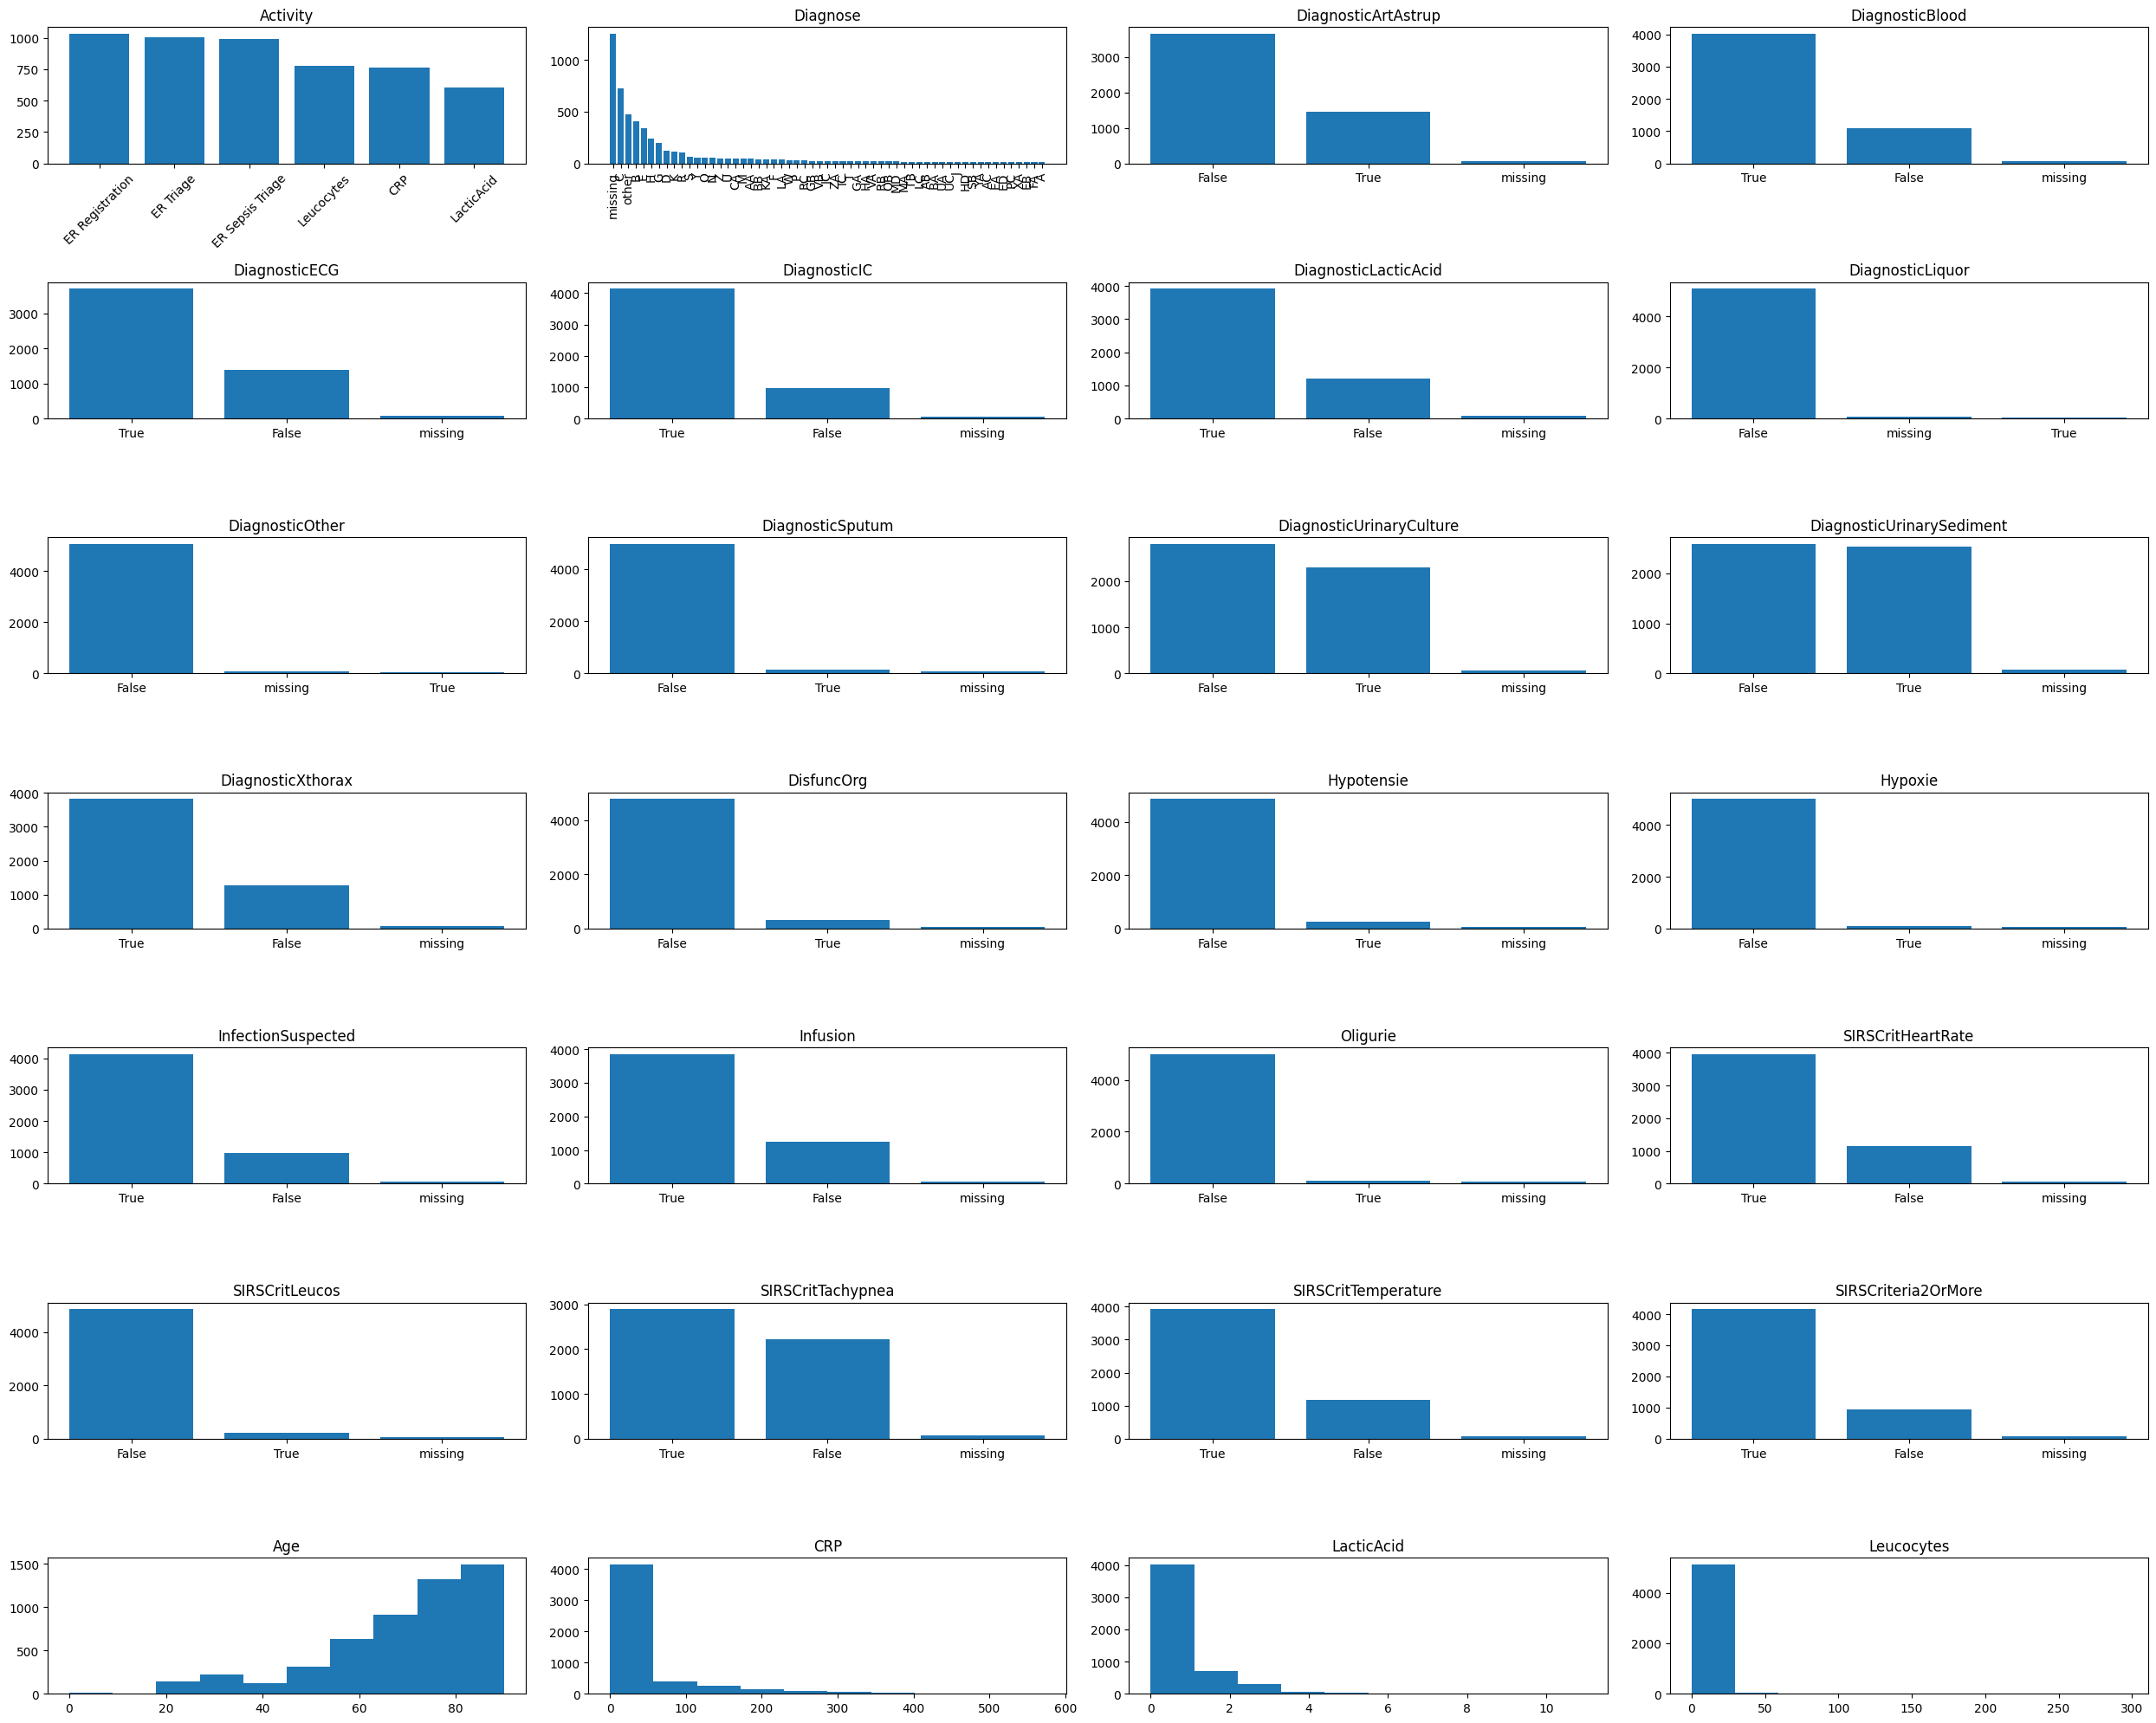

In [7]:
fig, axes = plt.subplots(7, 4, figsize=(25, 20))
flattened_axes = axes.flatten()
columns_to_plot = CATEGORICAL_FEATURES + BOOLEAN_FEATURES + NUMERICAL_FEATURES
for col, ax in zip(columns_to_plot, flattened_axes):
    counts = data[col].value_counts()
    if col in CATEGORICAL_FEATURES + BOOLEAN_FEATURES:
        ax.bar(counts.index.map(str), counts.values)
        num_unique_values = len(data[col].unique())
        labelrotation = None
        if 5 < num_unique_values <= 10:
            labelrotation = 45
        elif num_unique_values > 10:
            labelrotation = 90
        ax.tick_params("x", labelrotation=labelrotation)
    elif col in NUMERICAL_FEATURES:
        ax.hist(data[col])
    ax.set_title(col)
fig.tight_layout()
plt.show()

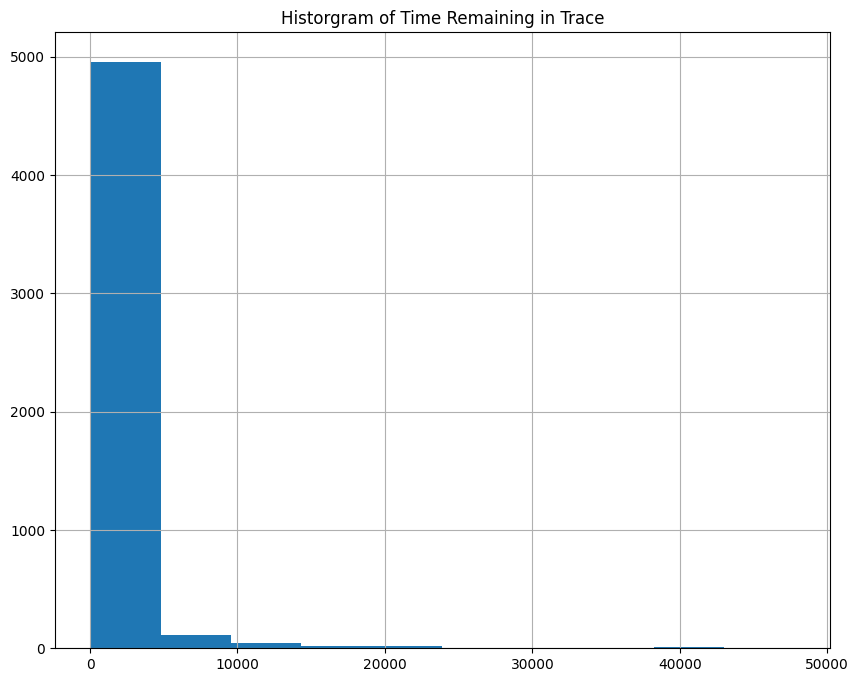

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
data.remtime.hist(ax=ax)
ax.set_title("Historgram of Time Remaining in Trace")
plt.show()

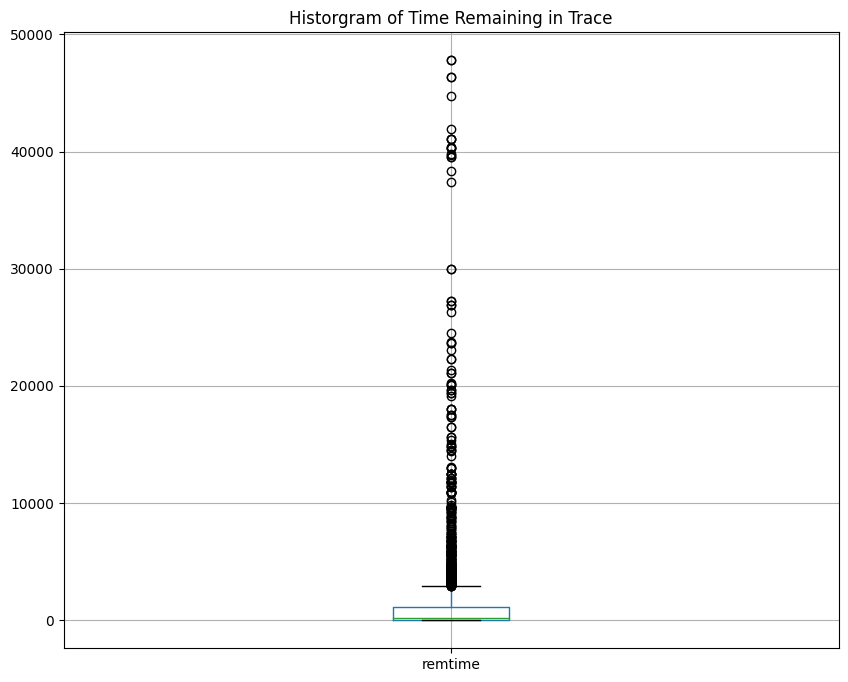

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
data.boxplot(ax=ax,column='remtime');
ax.set_title("Historgram of Time Remaining in Trace")
plt.show()

#### Correlation plot

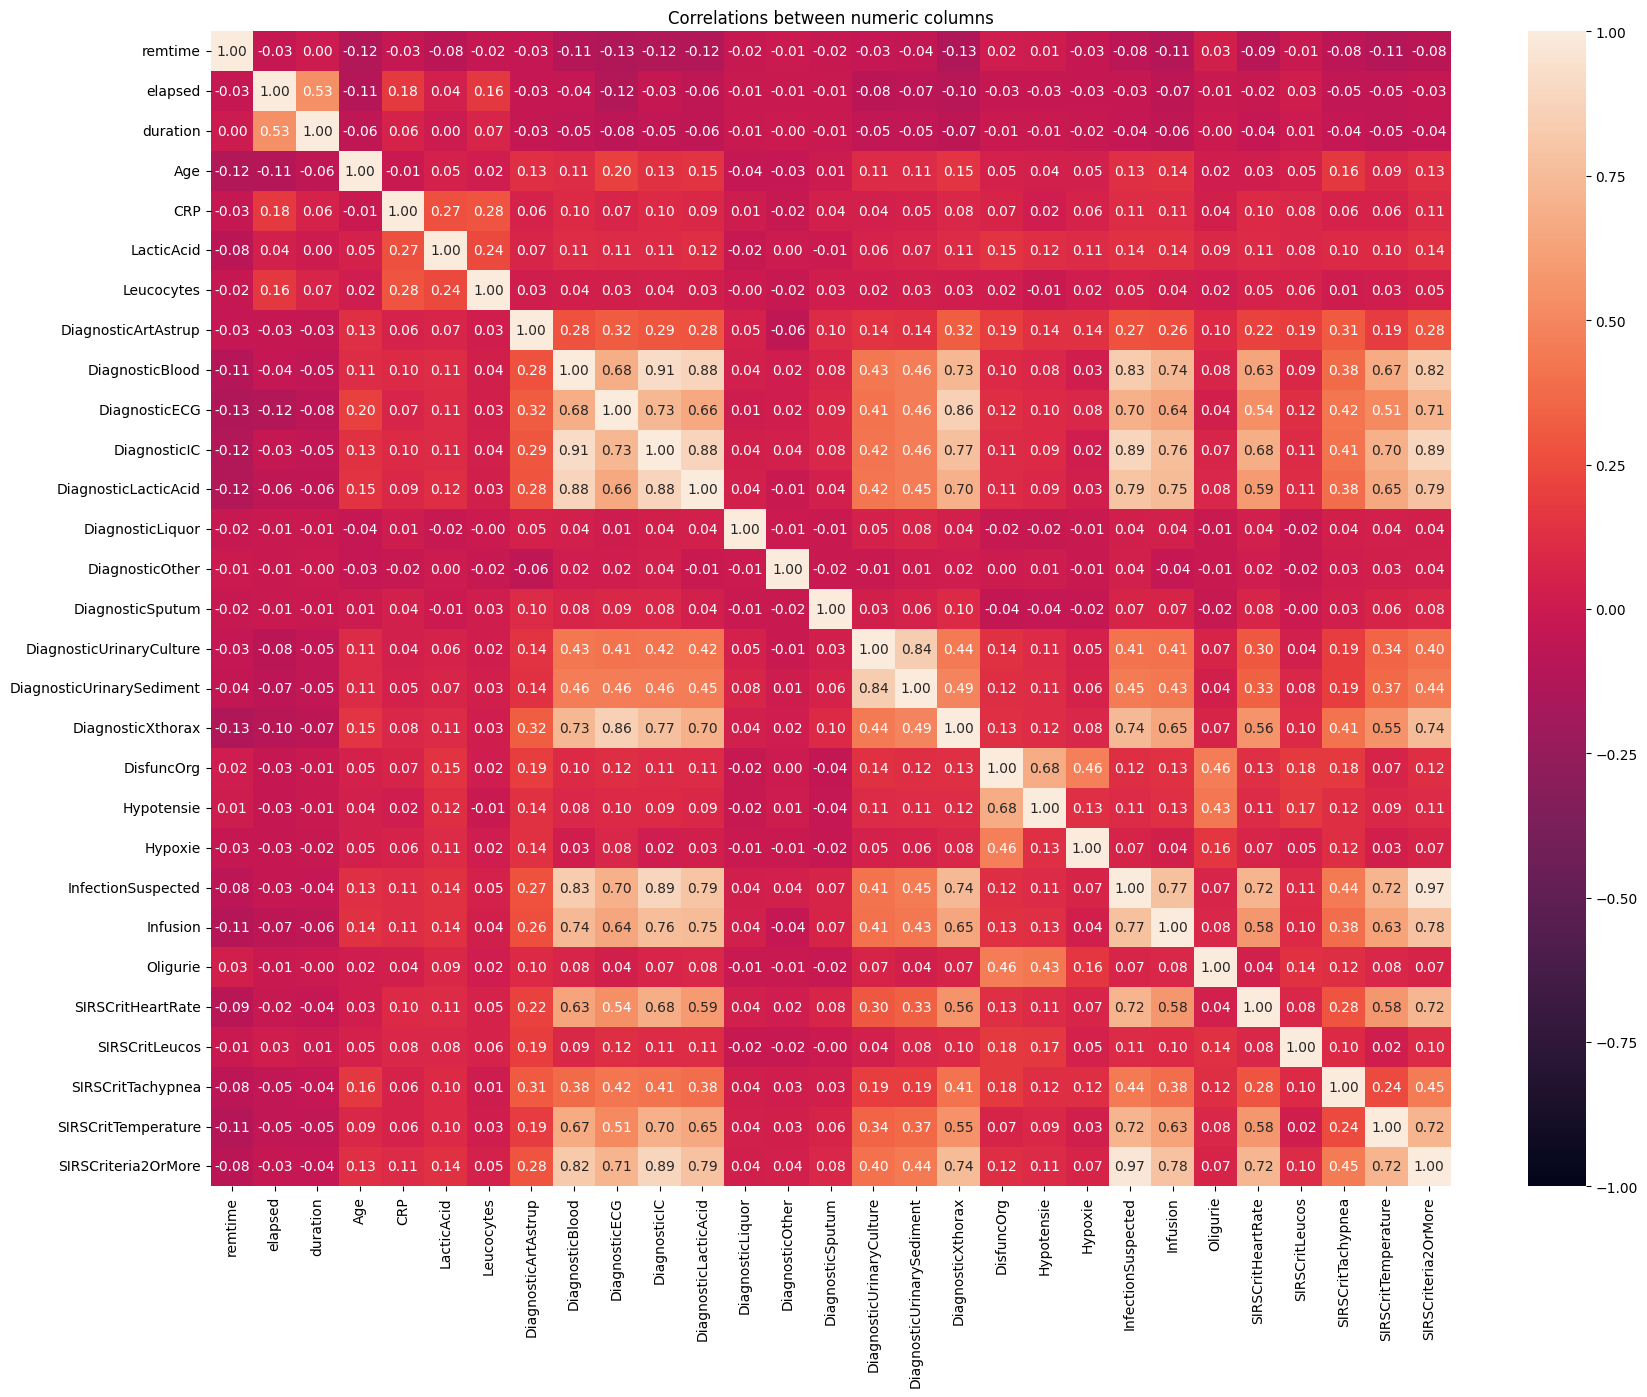

In [10]:
import seaborn as sns

boolean_features_recoded = (
    data[BOOLEAN_FEATURES]
    .applymap(lambda value: {"True": 1, "False": 0}.get(value))
    .astype("Int8")
)
correlation_matrix = pd.concat(
    [data[DURATION_FEATURES + NUMERICAL_FEATURES], boolean_features_recoded], axis=1
).corr()
fig = plt.figure(figsize=(20, 15))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    vmin=-1,
    vmax=1,
)
plt.title("Correlations between numeric columns")
plt.show()

### 1.2 Data cleaning

You have now gathered some information about the data during the data exploration task. You also know from the assignment description that you will be using regression trees and kNN regression models to predict the remaining time.

Based on the above information, decide on which cleaning steps you will need to perform and implement them accordingly.


In [11]:
## TODO: fill in the empty cells if necessary

# Fill empty cells in BOOLEAN_FEATURES & "Diagnose" with consistent values for that case
values_to_replace = {"missing", 0}
for case_id in data["Case ID"].unique():
    case_data = data[data["Case ID"] == case_id]

    for column in BOOLEAN_FEATURES + ["Diagnose"]:
        non_missing_values = set(
            v for v in case_data[column] if v not in values_to_replace
        )
        if len(non_missing_values) > 1:
            raise ValueError(
                f"Inconsistent values found for Case ID {case_id} in column {column}"
            )

        if case_data[column].isin(values_to_replace).any():
            fill_value = non_missing_values.pop() if non_missing_values else "missing"
            data.loc[data["Case ID"] == case_id, column] = data.loc[
                data["Case ID"] == case_id, column
            ].replace("missing", fill_value)


# Drop cases that only contain missing values
data = data[~data["Case ID"].isin(["GW", "LZ"])]

In [12]:
# Fill empty cells for NUMERICAL_FEATURES
data = data.sort_values(["Case ID", "elapsed"])
for case_id in data["Case ID"].unique():
    case_mask = data["Case ID"] == case_id
    data.loc[case_mask, NUMERICAL_FEATURES] = (
        data.loc[case_mask, NUMERICAL_FEATURES]
        .replace({0: None})
        .fillna(method="bfill")
        .fillna(method="ffill")
    )

In [13]:
# For columns that still having missing values, fill with the mean for that column
for column in data.columns:
    if not data[column].isnull().sum():
        continue
    data[column].fillna(data[column].mean(), inplace=True)

In [14]:
## TODO: perform data transformation steps if necessary

# Convert boolean columns to 1 and 0
data[BOOLEAN_FEATURES] = (
    data[BOOLEAN_FEATURES].replace({"True": 1, "False": 0}).astype("int8")
)

# one-hot-encode "Diagnose" columns
data = pd.get_dummies(data, columns=["Diagnose"], prefix_sep="=", dtype=int)

### 1.3 Process Discovery and Visualization (Optional)

This is an optional task to show you how process discovery and visualizaion can be deployed using the pm4py library. 

(*The following code requires the graphviz library to be installed. If you have issues with installing the graphviz, you may try to follow the instructions on Install GraphViz on the [pm4py](https://pm4py.fit.fraunhofer.de/install-page) install page*)

The following code:
- fill in the columns for case id, activity, and timestamps
- convert the data set into an event log
- discover a Directly-follows graph (DFG) and a process model for each event log. 
- you may use the discovered process model in your report



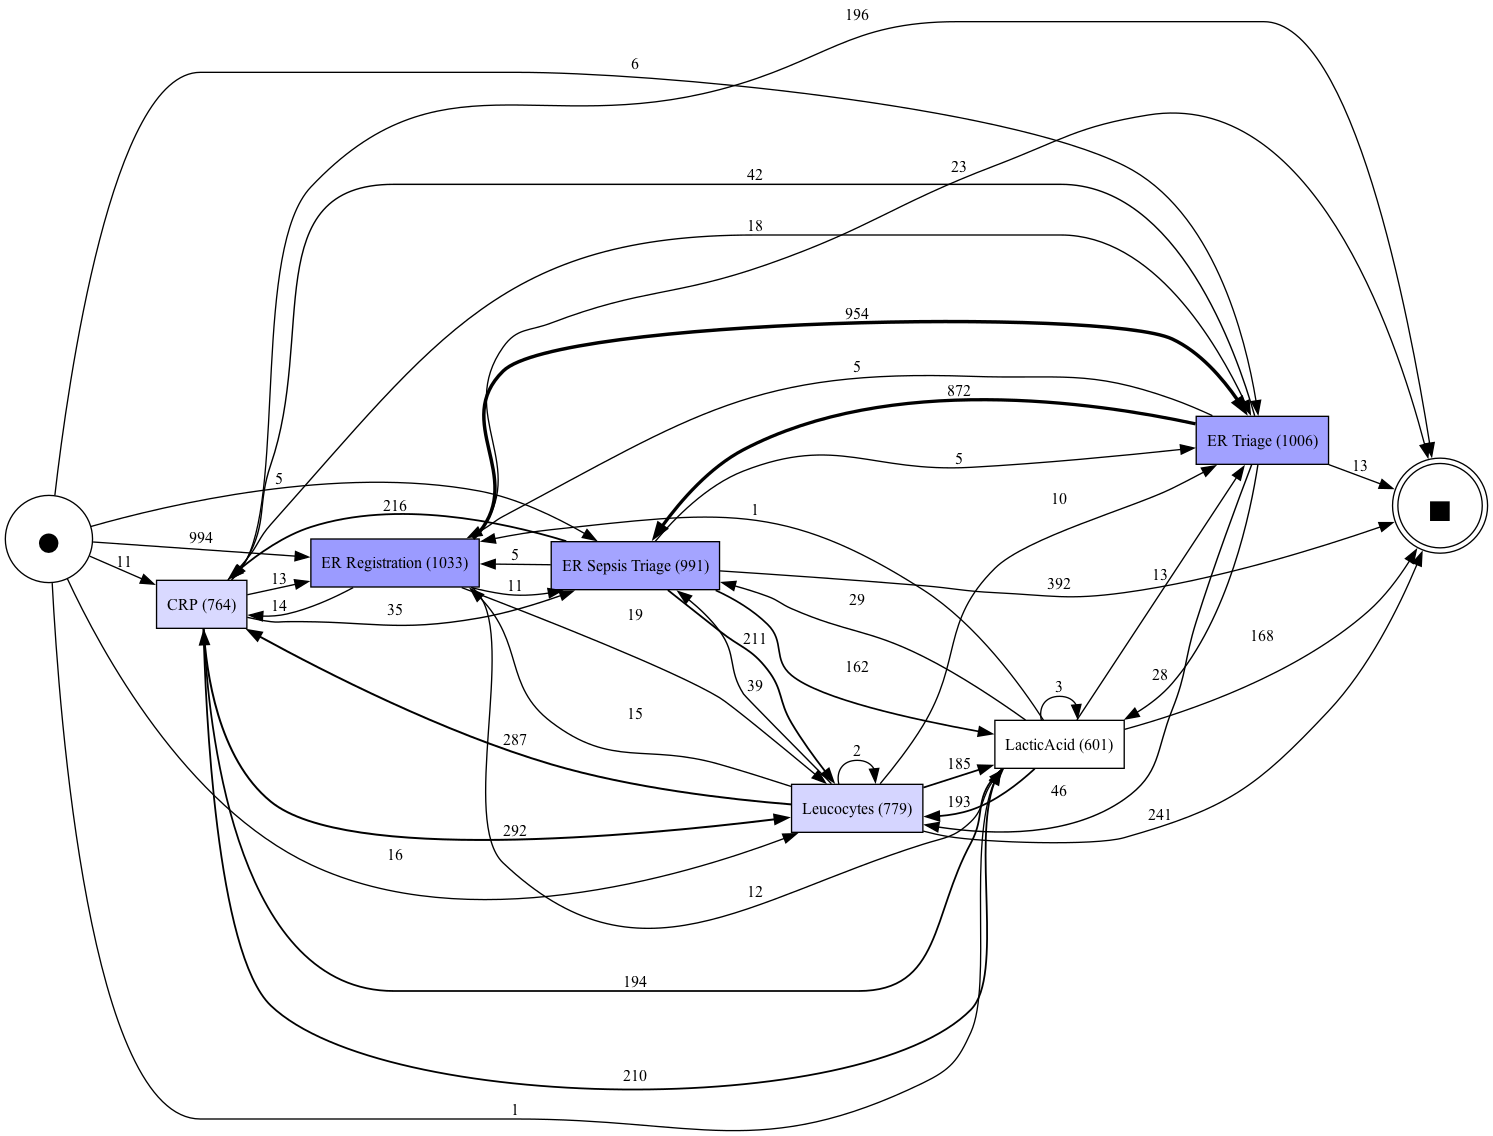

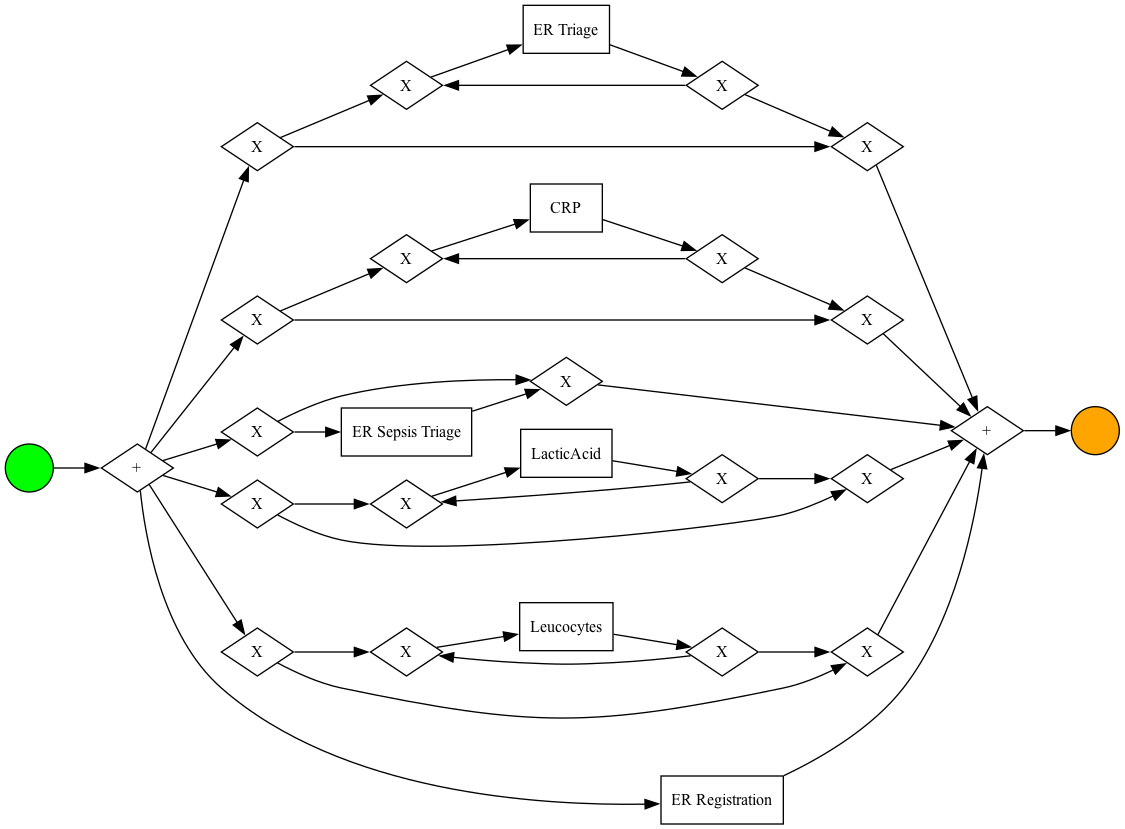

In [15]:
# Install pm4py library and graphviz library using pip install
# !pip install -U pm4py
# !pip install graphviz
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="pm4py")

import pm4py

# Fill in the column names of case id, activity, and time stamps
column_Sepsis_CaseID = "Case ID"
column_Sepsis_Activity = "Activity"
column_Sepsis_Timestamps = "Complete Timestamp"

data[column_Sepsis_CaseID] = data[column_Sepsis_CaseID].astype(str)


# Convert the data to an event log
log_Sepsis = pm4py.format_dataframe(
    data.copy(),
    case_id=column_Sepsis_CaseID,
    activity_key=column_Sepsis_Activity,
    timestamp_key=column_Sepsis_Timestamps,
)

# Set the log to be the one that you are interested
log = log_Sepsis

# Create a Directly-Follows Graph (DFG) and plot this graph
dfg, start_activities, end_activities = pm4py.discover_dfg(log)
pm4py.view_dfg(dfg, start_activities, end_activities)

# Discover a Process Model using Inductive Miner and plot this BPMN model
# process_tree = pm4py.discover_tree_inductive(log)
process_tree = pm4py.discover_process_tree_inductive(log)
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)

----

## Task 2: Preprocessing and Trace Encoding


### 2.1 Trace Encoding


- Implement the last-2-state encoding for the data set 
- Implement the aggregated encoding for the data set (for example, see [1], Table 6)


<span style="color:gray">[1] Ilya Verenich, Marlon Dumas, Marcello La Rosa, Fabrizio Maria Maggi, Irene Teinemaa:
Survey and Cross-benchmark Comparison of Remaining Time Prediction Methods in Business Process Monitoring. ACM Trans. Intell. Syst. Technol. 10(4): 34:1-34:34 (2019) [Section 1, 2, 4.1, 4.3, 4.6, 5.2, 5.3, 5.4, and 6] </span>

These two encodings are discussed during lecture 7.
In case you find difficult to implement the algorithms, you may also consider use the pandas functions to help you:
- for the last-2-state encoding, check the pandas groupby.DataFrameGroupBy.shift and see the [answer on the stake overflow](https://stackoverflow.com/questions/53335567/use-pandas-shift-within-a-group)
- for the aggregated encoding check the pandas groupby.DataFrameGroupBy and cumsum function and read the [examples and answers on the stake overflow](https://stackoverflow.com/a/49578219)

In [16]:
# TODO: Implement the function that returns the last-state encoding of a log
def last_2_state_encoding(df, column_case, column_activity):
    df = df.sort_values([column_case, "elapsed"])
    column_previous_activity = "Previous" + column_activity
    df[column_previous_activity] = df.groupby(column_case)[column_activity].shift(1)
    return pd.get_dummies(
        df,
        columns=[column_activity, column_previous_activity],
        prefix_sep="=",
        dtype=int,
    )


# TODO: Implement the function that returns the aggregated state encoding of a log
def agg_state_encoding(df, column_case, column_activity):
    df = df.sort_values([column_case, "elapsed"])
    encoded_df = pd.get_dummies(
        df, columns=[column_activity], prefix_sep="=", dtype=int
    )
    encoded_columns = [
        c for c in encoded_df.columns if c.startswith(f"{column_activity}=")
    ]
    encoded_df[encoded_columns] = encoded_df.groupby(column_case)[
        encoded_columns
    ].cumsum()
    return encoded_df


# TODO: for each of the two data sets, create a last_2_state encoding and an aggregated state encoding
data_ls = last_2_state_encoding(data, "Case ID", "Activity")
data_ag = agg_state_encoding(data, "Case ID", "Activity")

### 2.2 Create Training and Held-out test data sets


Create a training and a held-out test data set. *Later in Task 3-4, the training data will be used to perform cross-validation. The held-out test data will be used to evaluate the performance of the selected models.*

Choose the size of your test data. Furthermore, how did you split the data? Motivate your choice when you discuss the experiment setup in your report. 



Tips: *You may consider reuse some of your code from Assignment 1 Task 1.2*

In [17]:
from sklearn.model_selection import GroupShuffleSplit


def group_train_test_split(X, y, groups, test_size=0.2):
    splitter = GroupShuffleSplit(
        test_size=test_size, n_splits=1, random_state=RANDOM_SEED
    )
    split = splitter.split(X, y, groups)
    train_idx, test_idx = next(split)
    X_train = X.iloc[train_idx]
    X_test = X.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]
    return X_train, X_test, y_train, y_test


columns_to_exclude = TIMESTAMP_FEATURES + IDENTIFIER_FEATURES + ["remtime"]
class_column = "remtime"

# TODO: create training data and held-out test data for *data_ls*
features_ls = [c for c in data_ls.columns if c not in columns_to_exclude]
X_ls = data_ls[features_ls]
y_ls = data_ls[[class_column]]
groups_ls = data_ls[["Case ID"]]
X_ls_train, X_ls_test, y_ls_train, y_ls_test = group_train_test_split(
    data_ls[features_ls], data_ls[[class_column]], groups_ls
)

# TODO: create training data and held-out test data for *data_ag*
features_ag = [c for c in data_ag.columns if c not in columns_to_exclude]
X_ag = data_ag[features_ag]
y_ag = data_ag[[class_column]]
groups_ag = data_ag[["Case ID"]]
X_ag_train, X_ag_test, y_ag_train, y_ag_test = group_train_test_split(
    data_ag[features_ag], data_ag[[class_column]], groups_ag
)

----

## Task 3: Predicting Case Remaining Time - Regression Trees


In this task, you will use the regression tree (or random forest regression if you prefer) to learn a regression model to predict case remaining time. Very similar to how you have trained a classification model in Assignment 1, now perform the following steps to train a regression model. 

i) use the default values for the parameters to get a [Regression Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) (or a [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) running on the training data. (*Optional: visualize the tree, the feature importance, and compute the error measures to get an impression of the performance of the model*).

ii) use 5-fold cross-validation to determine a possibly better choice for the two parameters *min_samples_leaf* and *max_depth*
    
iii) create 2D or 3D plot that shows how the selected parameters affect the performance. 

iv) select the best-performing regression tree (or forest), i.e., the one that achieved the lowest cross-validated errors, and report all the error measures (MAE, MSE, RMSE, R^2) of the fitted model on the held-out test data. 

    
#### TIPS:
You may consider reuse the some of your code of Assignment 1 or use the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class (see an [example](https://www.dezyre.com/recipes/find-optimal-parameters-using-gridsearchcv-for-regression), but be aware that GridSearchSV does not return MAE or the other error measures (e.g., MSE, RMSE, R^2), you will need to update the scoring function)



In [18]:
# TODO: import packages

import math

import numpy as np
from sklearn.metrics import (
    make_scorer,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


# Define scorers
scoring = {
    "mae": make_scorer(mean_absolute_error, greater_is_better=False),
    "rmse": make_scorer(rmse, greater_is_better=False),
    "mse": make_scorer(mean_squared_error, greater_is_better=False),
    "r2": make_scorer(r2_score),
}


def performance_metrics(y_true, y_pred, print_=True):
    if print_:
        print(f"MAE:\t {mean_absolute_error(y_true, y_pred):.2}")
        print(f"MSE:\t {mean_squared_error(y_true, y_pred):.2}")
        print(f"RMSE:\t {math.sqrt(mean_squared_error(y_true, y_pred)):.2}")
        print(f"R2:\t {r2_score(y_true, y_pred):.2}")
    return {
            "MAE": mean_absolute_error(y_true, y_pred),
            "MSE": mean_squared_error(y_true, y_pred),
            "RMSE": rmse(y_true, y_pred),
            "R2": r2_score(y_true, y_pred),
        }

### 3.1 Prediction with last-2-state encoding

In [19]:
# TODO: using *data_ls* and test the default regression tree model
rt_ls_default = DecisionTreeRegressor(random_state=RANDOM_SEED)
rt_ls_default.fit(X_ls_train, y_ls_train)
res = rt_ls_default.predict(X_ls_test)
rt_ls_default_performance = performance_metrics(y_ls_test, res)

MAE:	 1.2e+03
MSE:	 1.4e+07
RMSE:	 3.8e+03
R2:	 0.0064


Resulting depth with without setting a limit: 40


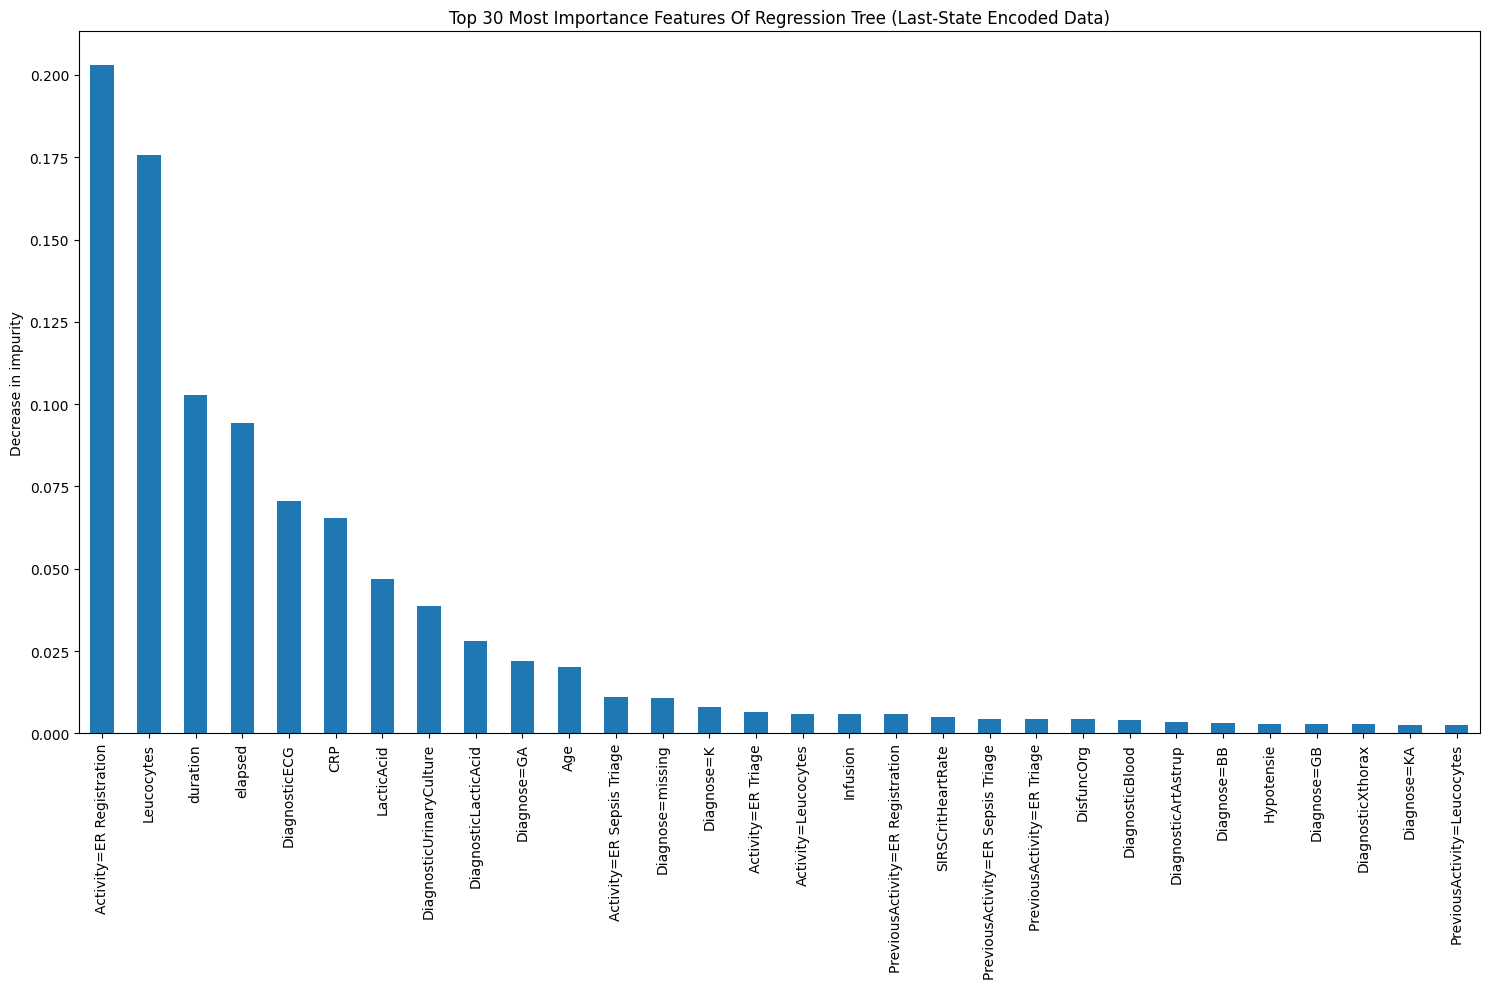

In [20]:
# TODO: plot the feature importances


def plot_feature_importance(classifier, features, n=None, subtitle=None):
    feature_importance = pd.Series(
        classifier.feature_importances_, index=features
    ).sort_values(ascending=False)
    if n is not None:
        feature_importance = feature_importance.head(n)
    fig, ax = plt.subplots(figsize=(15, 10))
    feature_importance.plot.bar(ax=ax)
    title = f"top {n} " if n is not None else ""
    title += "most importance features of regression tree"
    if subtitle is not None:
        title += f" ({subtitle})"
    ax.set_title(title.title())
    ax.set_ylabel("Decrease in impurity")
    fig.tight_layout()


plot_feature_importance(
    rt_ls_default, X_ls_train.columns, 30, "last-state encoded data"
)
print(f"Resulting depth with without setting a limit: {rt_ls_default.get_depth()}")

In [21]:
# Learn optimal model
rt_ls_grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=RANDOM_SEED),
    cv=5,
    param_grid={
        "max_depth": np.arange(1, 14) ** 2,
        "min_samples_leaf": np.arange(1, 100, 5),
    },
    scoring=scoring,
    refit="mae",
    n_jobs=-1,
)
rt_ls_grid_search.fit(X_ls_train, y_ls_train)
print(
    "The best resulting model have the following parameters:",
    rt_ls_grid_search.best_params_,
)

best_model_rt_ls = rt_ls_grid_search.best_estimator_
best_model_rt_ls.fit(X_ls_train, y_ls_train)
rt_ls_best_performance = performance_metrics(y_ls_test, best_model_rt_ls.predict(X_ls_test))

The best resulting model have the following parameters: {'max_depth': 16, 'min_samples_leaf': 31}
MAE:	 1.1e+03
MSE:	 6.8e+06
RMSE:	 2.6e+03
R2:	 0.52


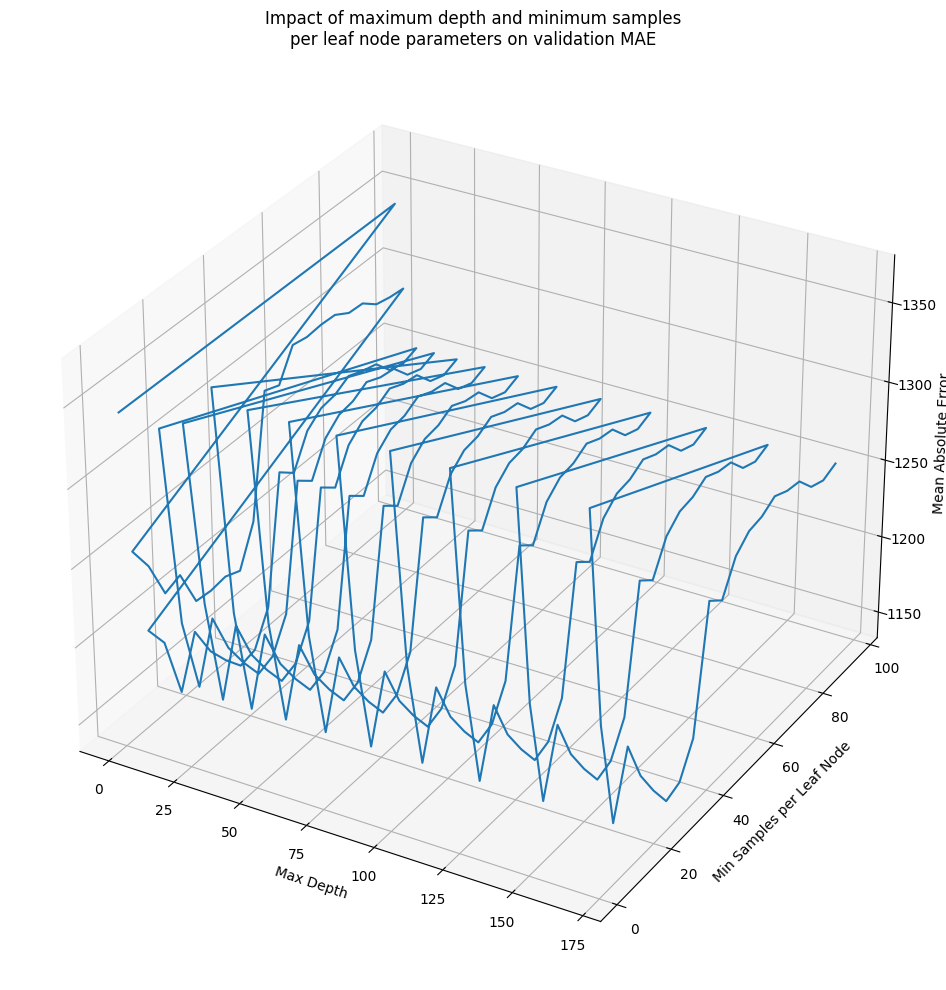

In [22]:
# TODO: create 2D or 3D plot that shows how the selected parameter values affect the MAE (or RMSE).


def gather_results(grid_search):
    results_iterable = zip(
        grid_search.cv_results_["params"], -grid_search.cv_results_["mean_test_mae"]
    )
    return pd.DataFrame(
        [param_choice | {"mae": mae} for param_choice, mae in results_iterable]
    )


def _3d_parameter_plot(grid_search):
    results = gather_results(grid_search)

    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection="3d")

    ax.plot(results.max_depth, results.min_samples_leaf, results.mae)
    ax.set_xlabel("Max Depth")
    ax.set_ylabel("Min Samples per Leaf Node")
    ax.set_zlabel("Mean Absolute Error")
    ax.set_title(
        "Impact of maximum depth and minimum samples\n"
        "per leaf node parameters on validation MAE"
    )
    fig.tight_layout()


_3d_parameter_plot(rt_ls_grid_search)

### 3.2 Prediction with aggregated encoding

In [23]:
# TODO: using *data_ag* and test the default regression tree model

rt_ag_default = DecisionTreeRegressor(random_state=RANDOM_SEED)
rt_ag_default.fit(X_ag_train, y_ag_train)
res = rt_ag_default.predict(X_ag_test)
rt_ag_default_performance = performance_metrics(y_ag_test, res)

MAE:	 1.2e+03
MSE:	 1.7e+07
RMSE:	 4.1e+03
R2:	 -0.18


Resulting depth with without setting a limit: 45


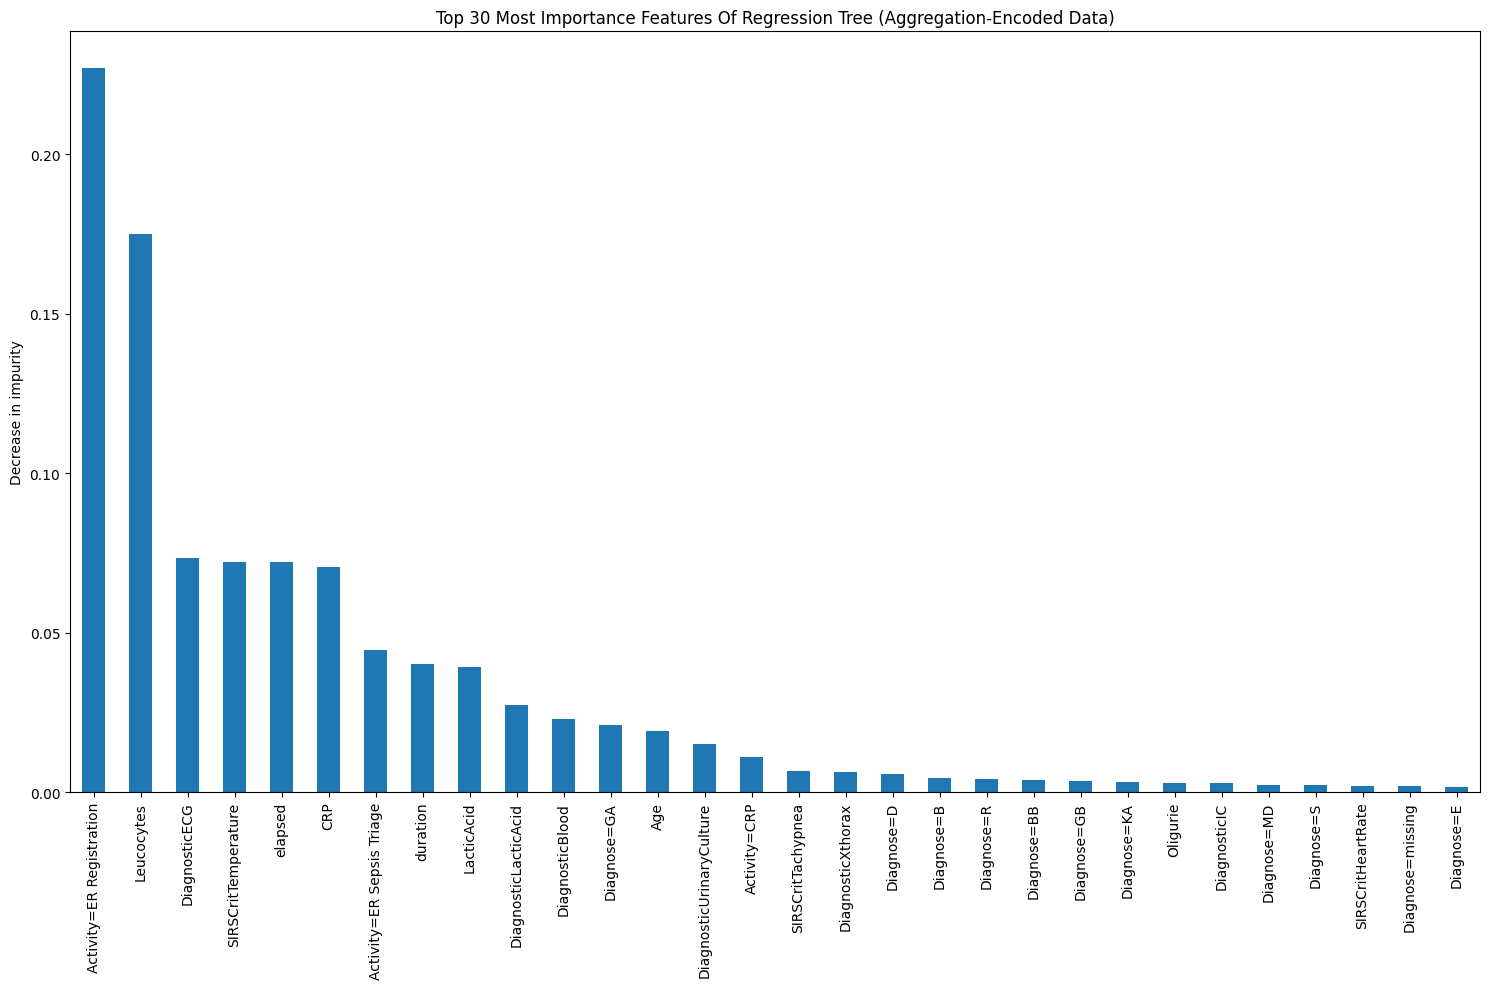

In [24]:
# Plot feature importance and Tree depth
plot_feature_importance(
    rt_ag_default, X_ag_train.columns, 30, "aggregation-encoded data"
)
print(f"Resulting depth with without setting a limit: {rt_ag_default.get_depth()}")

In [25]:
# Parameter tuning with 5fold cross-validation
rt_ag_grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=RANDOM_SEED),
    cv=5,
    param_grid={
        "max_depth": np.arange(1, 14) ** 2,
        "min_samples_leaf": np.arange(1, 100, 5),
    },
    scoring=scoring,
    refit="mae",
    n_jobs=-1,
)
rt_ag_grid_search.fit(X_ag_train, y_ag_train)
print(
    "The best resulting model have the following parameters:",
    rt_ag_grid_search.best_params_,
)
best_model_rt_ag = rt_ag_grid_search.best_estimator_

best_model_rt_ag.fit(X_ag_train, y_ag_train)
rt_ag_best_performance = performance_metrics(y_ag_test, best_model_rt_ag.predict(X_ag_test))

The best resulting model have the following parameters: {'max_depth': 9, 'min_samples_leaf': 11}
MAE:	 9.7e+02
MSE:	 6.2e+06
RMSE:	 2.5e+03
R2:	 0.57


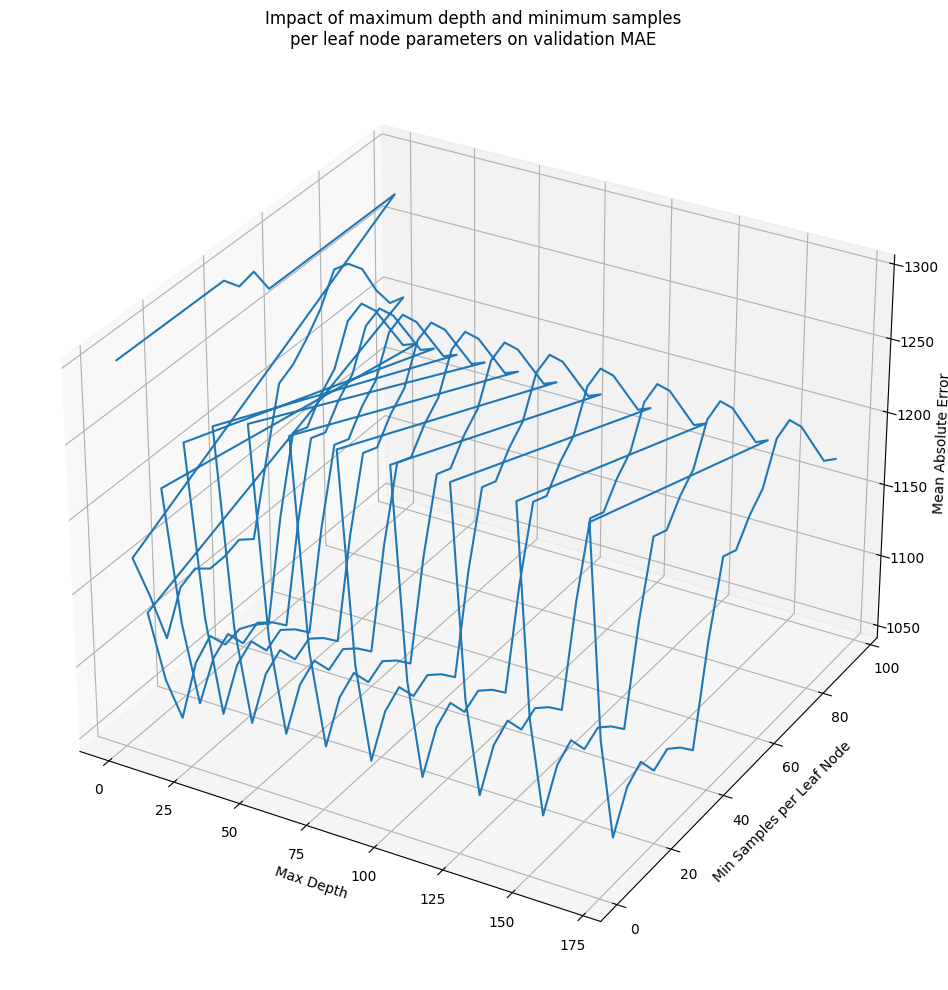

In [26]:
# TODO: create 2D or 3D plot that shows how the selected parameter values affect the MAE (or RMSE). 
_3d_parameter_plot(rt_ag_grid_search)

### Evaluation

In [27]:
rt_results = pd.DataFrame.from_dict(
    [
        {
            "Encoding": "Last-2-State",
            "Min. Samples/Leaf": best_model_rt_ls.get_params()["min_samples_leaf"],
            "Depth": best_model_rt_ls.get_depth(),
        }
        | rt_ls_best_performance,
        {
            "Encoding": "Last-2-State",
            "Min. Samples/Leaf": rt_ls_default.get_params()["min_samples_leaf"],
            "Depth": rt_ls_default.get_depth(),
        }
        | rt_ls_default_performance,
        {
            "Encoding": "Aggregated State",
            "Min. Samples/Leaf": best_model_rt_ls.get_params()["min_samples_leaf"],
            "Depth": best_model_rt_ls.get_params()["max_depth"],
        }
        | rt_ag_best_performance,
        {
            "Encoding": "Aggregated State",
            "Min. Samples/Leaf": rt_ag_default.get_params()["min_samples_leaf"],
            "Depth": rt_ag_default.get_depth(),
        }
        | rt_ag_default_performance,
    ]
)
rt_results

,Encoding,Min. Samples/Leaf,Depth,MAE,MSE,RMSE,R2
0,Last-2-State,31,16,1091.251674,6.826312e+06,2612.721181,0.519892
1,Last-2-State,1,40,1194.940722,1.412672e+07,3758.552420,0.006441
2,Aggregated State,31,16,968.506360,6.152153e+06,2480.353497,0.567307
3,Aggregated State,1,45,1242.760181,1.676526e+07,4094.540491,-0.179133


In [28]:
get_latex(rt_results)

\begin{tabular}{lrrrrrr}
\hline
Encoding & Min. Samples/Leaf & Depth & MAE & MSE & RMSE & R2 \\
\hline
Last-2-State & 31 & 16 & 1091.250000 & 6826311.970000 & 2612.720000 & 0.520000 \\
Last-2-State & 1 & 40 & 1194.940000 & 14126716.300000 & 3758.550000 & 0.010000 \\
Aggregated State & 31 & 16 & 968.510000 & 6152153.470000 & 2480.350000 & 0.570000 \\
Aggregated State & 1 & 45 & 1242.760000 & 16765261.830000 & 4094.540000 & -0.180000 \\
\hline
\end{tabular}



----

## Task 4. Predicting Case Remaining Time - kNN Regression


In this task, you will use the kNN Regression to learn a regression model to predict case remaining time. The same as task 3, now perform the following steps to train a regression model. 

i) use the default values for the parameters to get a [kNN Regression](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) running on the training data. (*Optional: compute the error measures to get an impression of the performance of the model).

ii) use 5-fold cross-validation to determine a possibly better choice for the two parameters *n_neighbors* and *weights* 
    
iii) create 2D or 3D plot that shows how the selected parameters affect the performance. 

iv) select the best-performing kNN, i.e., the one that achieved the lowest cross-validated errors, and report all the error measures (MAE, MSE, RMSE, R^2) of the fitted model on the held-out test data. 

    
#### TIPS:
The same here, you may consider reuse the some of your code of Assignment 1 or use the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class (see an [example](https://www.dezyre.com/recipes/find-optimal-parameters-using-gridsearchcv-for-regression), but be aware that GridSearchSV does not return MAE or the other error measures (e.g., MSE, RMSE, R^2), you will need to update the scoring function)







### 4.1 Prediction with last-2-state encoding


In [29]:
# TODO: import packages
from sklearn.neighbors import KNeighborsRegressor

# TODO: using *data_ls* and test the default kNN Regressor model 
knn_ls_default = KNeighborsRegressor()
knn_ls_default.fit(X_ls_train, y_ls_train)
pred = knn_ls_default.predict(X_ls_test)
knn_ls_default_performance = performance_metrics(y_ls_test, pred)

MAE:	 1.4e+03
MSE:	 1.5e+07
RMSE:	 3.9e+03
R2:	 -0.061


In [30]:
# Learn optimal model
max_neighbors = len(X_ls_test) - 1

knn_ls_grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    cv=5,
    param_grid={
        "n_neighbors": (
            [2**i for i in range(int(np.log2(max_neighbors)))] + [max_neighbors]
        ),
        "weights": ["uniform", "distance"],
    },
    scoring=scoring,
    refit="mae",
    n_jobs=-1,
)
knn_ls_grid_search.fit(X_ls_train, y_ls_train)
print(
    "The best resulting model have the following parameters:",
    knn_ls_grid_search.best_params_,
)
best_model_knn_ls = knn_ls_grid_search.best_estimator_

# TODO: compute the performance of the model on your held-out test data
best_model_knn_ls.fit(X_ls_train, y_ls_train)
pred = best_model_knn_ls.predict(X_ls_test)
knn_ls_best_performance = performance_metrics(y_ls_test, pred)

The best resulting model have the following parameters: {'n_neighbors': 256, 'weights': 'distance'}
MAE:	 1.3e+03
MSE:	 1.3e+07
RMSE:	 3.6e+03
R2:	 0.075


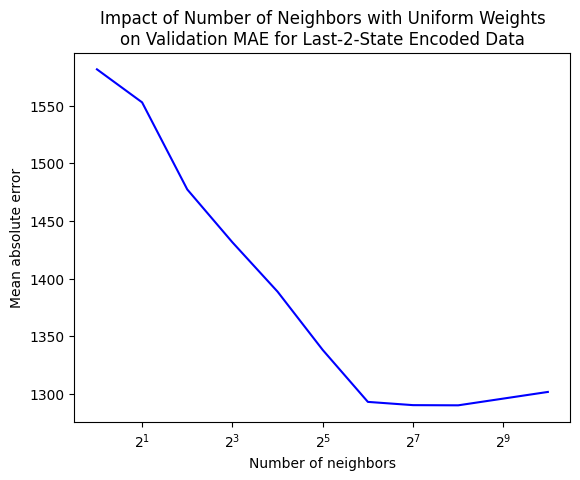

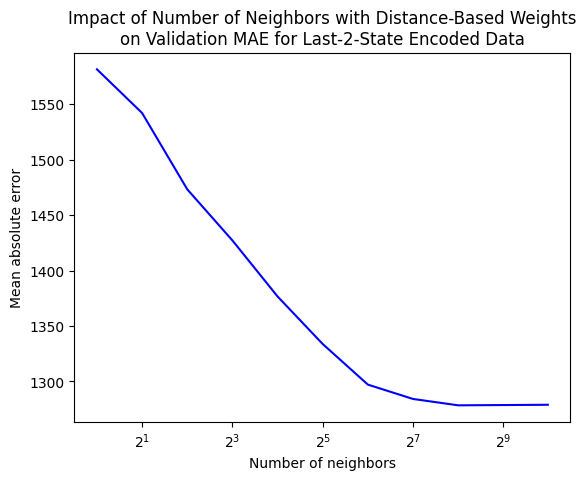

In [31]:
# TODO: create 2D or 3D plot that shows how the selected parameter values affect the MAE (or RMSE).

results = gather_results(knn_ls_grid_search)


def impact_of_neighbours_on_mae(results, type_of_weight, dataset):
    filtered_results = results[results["weights"].eq(type_of_weight)]
    plt.plot(filtered_results["n_neighbors"], filtered_results["mae"], color="blue")
    # Adding labels and title
    plt.xlabel("Number of neighbors")
    plt.xscale("log", base=2)
    plt.ylabel("Mean absolute error")
    if type_of_weight == "distance":
        type_of_weight += "-based"
    plt.title(
        f"Impact of Number of Neighbors with {type_of_weight.title()} Weights\n"
        f"on Validation MAE for {dataset} Data"
    )
    plt.show()


impact_of_neighbours_on_mae(results, "uniform", "Last-2-State Encoded")
impact_of_neighbours_on_mae(results, "distance", "Last-2-State Encoded")

### 4.2 Prediction with aggregated encoding

In [32]:
# TODO: using *data_ag* and test the default kNN Regressor model 
knn_ag_default = KNeighborsRegressor()
knn_ag_default.fit(X_ag_train, y_ag_train)
pred = knn_ag_default.predict(X_ag_test)
knn_ag_default_performance = performance_metrics(y_ag_test, pred)

MAE:	 1.4e+03
MSE:	 1.5e+07
RMSE:	 3.9e+03
R2:	 -0.056


In [33]:
# Learn optimal model
max_neighbors = len(X_ag_test) - 1

knn_ag_grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    cv=5,
    param_grid={
        "n_neighbors": (
            [2**i for i in range(int(np.log2(max_neighbors)))] + [max_neighbors]
        ),
        "weights": ["uniform", "distance"],
    },
    scoring=scoring,
    refit="mae",
    n_jobs=-1,
)
knn_ag_grid_search.fit(X_ag_train, y_ag_train)
print(
    "The best resulting model have the following parameters:",
    knn_ag_grid_search.best_params_,
)
best_model_knn_ag = knn_ag_grid_search.best_estimator_

# TODO: compute the performance of the model on your held-out test data
best_model_knn_ag.fit(X_ag_train, y_ag_train)
pred = best_model_knn_ag.predict(X_ag_test)
knn_ag_best_performance = performance_metrics(y_ag_test, pred)

The best resulting model have the following parameters: {'n_neighbors': 256, 'weights': 'distance'}
MAE:	 1.3e+03
MSE:	 1.3e+07
RMSE:	 3.6e+03
R2:	 0.075


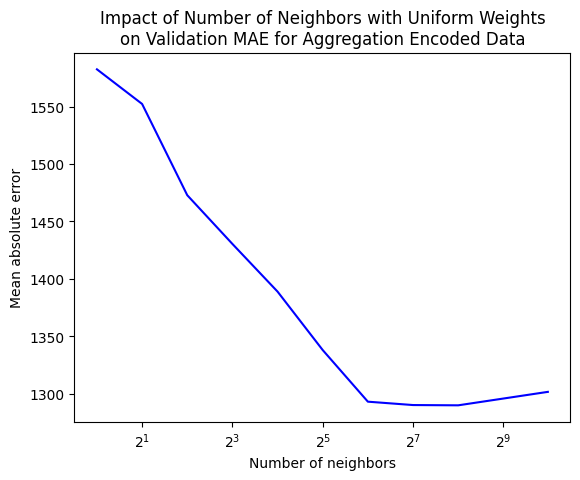

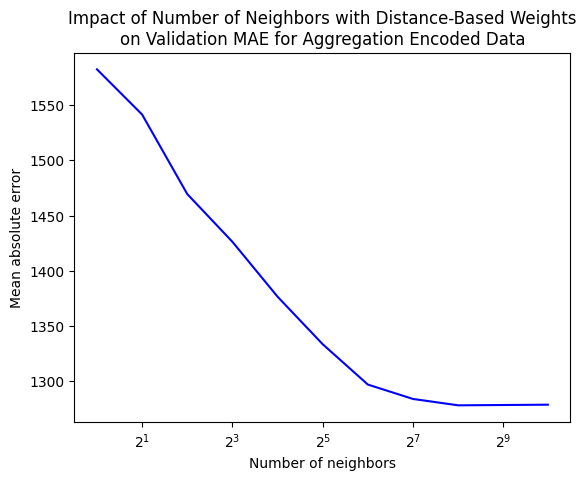

In [34]:
results = gather_results(knn_ag_grid_search)
impact_of_neighbours_on_mae(results, "uniform", "Aggregation Encoded")
impact_of_neighbours_on_mae(results, "distance", "Aggregation Encoded")

### Evaluation

In [35]:
knn_results = pd.DataFrame.from_dict(
    [
        {
            "Encoding": "Last-2-State",
            "Weights": best_model_knn_ls.get_params()["weights"],
            "Num. Neighbours": best_model_knn_ls.get_params()["n_neighbors"],
        }
        | knn_ls_best_performance,
        {
            "Encoding": "Last-2-State",
            "Weights": knn_ls_default.get_params()["weights"],
            "Num. Neighbours": knn_ls_default.get_params()["n_neighbors"],
        }
        | knn_ls_default_performance,
        {
            "Encoding": "Aggregated State",
            "Weights": best_model_knn_ls.get_params()["weights"],
            "Num. Neighbours": best_model_knn_ls.get_params()["n_neighbors"],
        }
        | knn_ag_best_performance,
        {
            "Encoding": "Aggregated State",
            "Weights": knn_ag_default.get_params()["weights"],
            "Num. Neighbours": knn_ag_default.get_params()["n_neighbors"],
        }
        | knn_ag_default_performance,
    ]
)
knn_results

,Encoding,Weights,Num. Neighbours,MAE,MSE,RMSE,R2
0,Last-2-State,distance,256,1302.902658,1.315010e+07,3626.306978,0.075128
1,Last-2-State,uniform,5,1429.415369,1.508306e+07,3883.692037,-0.060821
2,Aggregated State,distance,256,1302.753110,1.314897e+07,3626.150847,0.075208
3,Aggregated State,uniform,5,1421.931034,1.501728e+07,3875.213122,-0.056194


In [36]:
get_latex(knn_results)

\begin{tabular}{llrrrrr}
\hline
Encoding & Weights & Num. Neighbours & MAE & MSE & RMSE & R2 \\
\hline
Last-2-State & distance & 256 & 1302.900000 & 13150102.300000 & 3626.310000 & 0.080000 \\
Last-2-State & uniform & 5 & 1429.420000 & 15083063.840000 & 3883.690000 & -0.060000 \\
Aggregated State & distance & 256 & 1302.750000 & 13148969.960000 & 3626.150000 & 0.080000 \\
Aggregated State & uniform & 5 & 1421.930000 & 15017276.740000 & 3875.210000 & -0.060000 \\
\hline
\end{tabular}



---

## Bonus Tasks 

We would like to challenge you with the following bonus tasks. For each task that is successfully completed, you may obtain max. 1 extra point. 

1. Implement or use another regression algorithm (for example, [Random Forest Regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html), [LinearRegresion](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [SVM Regression](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py)) or design your own algorithm that achieves a better MAE measure. Explain this in your report.
2. Implement techniques (e.g., preprocessing, feature engineering, feature selection, sampling) that help improve the MAE scores of existing models. For example, try out a feature selection for kNN or implement inter-case features. Explain this in your report.



### Prediction with Random Forest Regressor

#### Last-state encoded

In [37]:
# TODO: import packages
from sklearn.ensemble import RandomForestRegressor

# TODO: using *data_ls* and test the default Random Forest Regression
default_forest_ls = RandomForestRegressor(random_state=RANDOM_SEED)
default_forest_ls.fit(X_ls_train, np.ravel(y_ls_train))
pred = default_forest_ls.predict(X_ls_test)
rf_default_performance_ls = performance_metrics(y_ls_test, pred)

MAE:	 1.1e+03
MSE:	 6.8e+06
RMSE:	 2.6e+03
R2:	 0.52


In [38]:
# Parameter tuning with 5fold cross-validation
grid_rf_ls = GridSearchCV(
    estimator=RandomForestRegressor(random_state=RANDOM_SEED),
    cv=5,
    param_grid={
        "max_depth": np.arange(1, 50, 10),
        "min_samples_leaf": np.arange(1, 10, 2),
    },
    scoring=scoring,
    refit="mae",
    n_jobs=-1,
)
grid_rf_ls.fit(X_ls_train, np.ravel(y_ls_train))
print(
    "The best resulting model have the following parameters: ", grid_rf_ls.best_params_
)
best_ls_rf = grid_rf_ls.best_estimator_

# TODO: compute the performance of the model on your held-out test data
best_ls_rf.fit(X_ls_train, y_ls_train)
pred = best_ls_rf.predict(X_ls_test)
rf_best_performance_ls = performance_metrics(y_ls_test, pred)

The best resulting model have the following parameters:  {'max_depth': 11, 'min_samples_leaf': 7}


/Users/coby/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE:	 9.6e+02
MSE:	 5.5e+06
RMSE:	 2.3e+03
R2:	 0.62


#### Aggregated State Encoding

In [39]:
# TODO: using *data_ag* and test the default Random Forest Regression
default_forest_ag = RandomForestRegressor(random_state=RANDOM_SEED)
default_forest_ag.fit(X_ag_train, np.ravel(y_ag_train))
pred = default_forest_ag.predict(X_ag_test)
rf_default_performance_ag = performance_metrics(y_ag_test, pred)

MAE:	 1e+03
MSE:	 7.4e+06
RMSE:	 2.7e+03
R2:	 0.48


In [40]:
# Parameter tuning with 5fold cross-validation
grid_rf_ag = GridSearchCV(
    estimator=RandomForestRegressor(random_state=RANDOM_SEED),
    cv=5,
    param_grid={
        "max_depth": np.arange(1, 100, 5),
        "min_samples_leaf": np.arange(1, 10, 2),
        "max_features": ["sqrt"],
    },
    scoring=scoring,
    refit="mae",
    n_jobs=-1,
)
grid_rf_ag.fit(X_ag_train, np.ravel(y_ag_train))
print(
    "The best resulting model have the following parameters: ", grid_rf_ag.best_params_
)
best_ag_rf = grid_rf_ag.best_estimator_

# TODO: compute the performance of the model on your held-out test data
best_ag_rf.fit(X_ag_train, y_ag_train)
pred = best_ag_rf.predict(X_ag_test)
rf_best_performance_ag = performance_metrics(y_ag_test, pred)

The best resulting model have the following parameters:  {'max_depth': 21, 'max_features': 'sqrt', 'min_samples_leaf': 1}


/Users/coby/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE:	 1e+03
MSE:	 6.7e+06
RMSE:	 2.6e+03
R2:	 0.53


### Feature Selection

In [41]:
# Exclude 'Diagnose' feature

features_ls_reduced = [c for c in features_ls if c != "Diagnose"]
(
    X_ls_train_reduced,
    X_ls_test_reduced,
    y_ls_train_reduced,
    y_ls_test_reduced,
) = group_train_test_split(
    data_ls[features_ls_reduced], data_ls[[class_column]], groups_ls
)

features_ag_reduced = [c for c in features_ag if c != "Diagnose"]
(
    X_ag_train_reduced,
    X_ag_test_reduced,
    y_ag_train_reduced,
    y_ag_test_reduced,
) = group_train_test_split(
    data_ag[features_ag_reduced], data_ag[[class_column]], groups_ag
)

#### Last-State encoding

In [42]:
# Learn optimal model
rf_reduced_grid_search_ls = GridSearchCV(
    estimator=RandomForestRegressor(random_state=RANDOM_SEED),
    cv=5,
        param_grid={
        "max_depth": np.arange(1, 100, 5),
        "min_samples_leaf": np.arange(1, 10, 2),
        "max_features": ["sqrt"],
    },
    scoring=scoring,
    refit="mae",
    n_jobs=-1,
)
rf_reduced_grid_search_ls.fit(X_ls_train_reduced, np.ravel(y_ls_train_reduced))
print(
    "The best resulting model have the following parameters:",
    rf_reduced_grid_search_ls.best_params_,
)
best_model_rf_reduced_ls = rf_reduced_grid_search_ls.best_estimator_

# TODO: compute the performance of the model on your held-out test data
best_model_rf_reduced_ls.fit(X_ls_train, np.ravel(y_ls_train))
pred = best_model_rf_reduced_ls.predict(X_ls_test)
rf_reduced_best_performance_ls = performance_metrics(y_ls_test, pred)

The best resulting model have the following parameters: {'max_depth': 21, 'max_features': 'sqrt', 'min_samples_leaf': 1}
MAE:	 1.2e+03
MSE:	 8.9e+06
RMSE:	 3e+03
R2:	 0.38


#### Aggregated State Encoding

In [43]:
# Learn optimal model
rf_reduced_grid_search_ag = GridSearchCV(
    estimator=RandomForestRegressor(random_state=RANDOM_SEED),
    cv=5,
        param_grid={
        "max_depth": np.arange(1, 100, 5),
        "min_samples_leaf": np.arange(1, 10, 2),
        "max_features": ["sqrt"],
    },
    scoring=scoring,
    refit="mae",
    n_jobs=-1,
)
rf_reduced_grid_search_ag.fit(X_ag_train_reduced, np.ravel(y_ag_train_reduced))
print(
    "The best resulting model have the following parameters:",
    rf_reduced_grid_search_ag.best_params_,
)
best_model_rf_reduced_ag = rf_reduced_grid_search_ag.best_estimator_

# TODO: compute the performance of the model on your held-out test data
best_model_rf_reduced_ag.fit(X_ag_train, np.ravel(y_ag_train))
pred = best_model_rf_reduced_ag.predict(X_ag_test)
rf_reduced_best_performance_ag = performance_metrics(y_ag_test, pred)

The best resulting model have the following parameters: {'max_depth': 21, 'max_features': 'sqrt', 'min_samples_leaf': 1}
MAE:	 1e+03
MSE:	 6.7e+06
RMSE:	 2.6e+03
R2:	 0.53


### Evaluation

In [44]:
rf_results = pd.DataFrame.from_dict(
    [
        {
            "Encoding": "Last-2-State",
            "Feature Selection": "False",
            "Depth": default_forest_ls.get_params()["max_depth"],
            "Min. Samples Leaf": default_forest_ls.get_params()["min_samples_leaf"],
        }
        | rf_default_performance_ls,
        {
            "Encoding": "Last-2-State",
            "Feature Selection": "False",
            "Depth": best_ls_rf.get_params()["max_depth"],
            "Min. Samples Leaf": best_ls_rf.get_params()["min_samples_leaf"],
        }
        | rf_best_performance_ls,
        {
            "Encoding": "Last-2-State",
            "Feature Selection": "True",
            "Depth": best_model_rf_reduced_ls.get_params()["max_depth"],
            "Min. Samples Leaf": best_model_rf_reduced_ls.get_params()[
                "min_samples_leaf"
            ],
        }
        | rf_reduced_best_performance_ls,
        {
            "Encoding": "Aggregated State",
            "Feature Selection": "False",
            "Depth": default_forest_ag.get_params()["max_depth"],
            "Min. Samples Leaf": default_forest_ag.get_params()["min_samples_leaf"],
        }
        | rf_default_performance_ag,
        {
            "Encoding": "Aggregated State",
            "Feature Selection": "False",
            "Depth": best_ag_rf.get_params()["max_depth"],
            "Min. Samples Leaf": best_ag_rf.get_params()["min_samples_leaf"],
        }
        | rf_best_performance_ag,
        {
            "Encoding": "Aggregated State",
            "Feature Selection": "True",
            "Depth": best_model_rf_reduced_ag.get_params()["max_depth"],
            "Min. Samples Leaf": best_model_rf_reduced_ag.get_params()[
                "min_samples_leaf"
            ],
        }
        | rf_reduced_best_performance_ag,
    ]
)
rf_results

,Encoding,Feature Selection,Depth,Min. Samples Leaf,MAE,MSE,RMSE,R2
0,Last-2-State,False,NaN,1,1094.840536,6.820378e+06,2611.585360,0.520310
1,Last-2-State,False,11.0,7,963.701886,5.462739e+06,2337.250362,0.615795
2,Last-2-State,True,21.0,1,1177.386057,8.857465e+06,2976.149423,0.377037
3,Aggregated State,False,NaN,1,1023.826206,7.350108e+06,2711.108344,0.483053
4,Aggregated State,False,21.0,1,1001.868815,6.695899e+06,2587.643444,0.529065
5,Aggregated State,True,21.0,1,1001.868815,6.695899e+06,2587.643444,0.529065


In [45]:
get_latex(rf_results)

\begin{tabular}{llrrrrrr}
\hline
Encoding & Feature Selection & Depth & Min. Samples Leaf & MAE & MSE & RMSE & R2 \\
\hline
Last-2-State & False & NaN & 1 & 1094.840000 & 6820378.090000 & 2611.590000 & 0.520000 \\
Last-2-State & False & 11.000000 & 7 & 963.700000 & 5462739.260000 & 2337.250000 & 0.620000 \\
Last-2-State & True & 21.000000 & 1 & 1177.390000 & 8857465.390000 & 2976.150000 & 0.380000 \\
Aggregated State & False & NaN & 1 & 1023.830000 & 7350108.450000 & 2711.110000 & 0.480000 \\
Aggregated State & False & 21.000000 & 1 & 1001.870000 & 6695898.600000 & 2587.640000 & 0.530000 \\
Aggregated State & True & 21.000000 & 1 & 1001.870000 & 6695898.600000 & 2587.640000 & 0.530000 \\
\hline
\end{tabular}



---
## Task 5.  Report your results and discuss your findings

By now, you have applied two algorithms with different parameters on the two encodings of the data set. For each algorithm and each encoding, you have created tables or figures which you can add to your report. Discuss the results and their optimal performance. 

Create an overview table or figure that shows the optimal performance of each algorithm on the data set, for example, see the table here below. 


Discuss your findings and reflect on the following questions in your report:
- According to the error measures, which one would you suggest as the optimal model? 
- Are there any discrepancies between the MAE, MSE, RMSE, and R^2 measures in terms of which model performs the best? If yes, how would you explain these discrepancies. 
- Which one of the MAE, MSE, RMSE, and R^2 would you use for selecting the model? Why?
- Which one of the encoding would you suggest for this data set? Why?
- Which features have a big influence on predicting the remaining time?







| Encoding | Model | CV MAE  | Test MAE |  CV MSE  |  Test MSE  | CV R^2 | Test R^2 |... |
|------|------|------|------|------|------|------|------|-----|
|  Last-2-state | Regression Tree        |  |  | | | | |
|  Agg-state |  Regression Tree  |  |  | || | |
|   Last-2-state |kNN       |  |  | || | |
|   ... |...       |  |  | || | |











In [46]:
datasets = {
    "Last-2-state encoding": {"X": X_ls, "y": y_ls},
    "Aggregated state encoding": {"X": X_ag, "y": y_ag},
}

final_results = pd.DataFrame.from_dict(
    [
        {
            "Encoding": "Last-2-state encoding",
            "Model": "Regression Tree",
            "grid_search": rt_ls_grid_search,
        }
        | rt_ls_best_performance,
        {
            "Encoding": "Aggregated state encoding",
            "Model": "Regression Tree",
            "grid_search": rt_ag_grid_search,
        }
        | rt_ag_best_performance,
        {
            "Encoding": "Last-2-state encoding",
            "Model": "kNN Regression",
            "grid_search": knn_ls_grid_search,
        }
        | knn_ls_best_performance,
        {
            "Encoding": "Aggregated state encoding",
            "Model": "kNN Regression",
            "grid_search": knn_ag_grid_search,
        }
        | knn_ag_best_performance,
        {
            "Encoding": "Last-2-state encoding",
            "Model": "Random Forest Regression",
            "grid_search": grid_rf_ls,
        }
        | rf_best_performance_ls,
        {
            "Encoding": "Aggregated state encoding",
            "Model": "Random Forest Regression",
            "grid_search": grid_rf_ag,
        }
        | rf_best_performance_ag,
        {
            "Encoding": "Last-2-state encoding",
            "Model": "Random Forest Regression (Feature Selection)",
            "grid_search": rf_reduced_grid_search_ls,
        }
        | rf_reduced_best_performance_ls,
        {
            "Encoding": "Aggregated state encoding",
            "Model": "Random Forest Regression (Feature Selection)",
            "grid_search": rf_reduced_grid_search_ag,
        }
        | rf_reduced_best_performance_ag,
    ]
)


final_results_cv_scores = final_results.apply(
    lambda row: {
        f"Mean CV { k.removeprefix('mean_test_').upper() }": (
            np.mean(row.grid_search.cv_results_[k]) * ((-1) ** (k != "mean_test_r2"))
        )
        for k in ["mean_test_mae", "mean_test_rmse", "mean_test_mse", "mean_test_r2"]
    },
    axis=1,
).apply(pd.Series)

final_results_table = pd.concat([final_results, final_results_cv_scores], axis=1).drop(
    columns=["grid_search"]
)
final_results_table.columns = [
    f"Test {c}" if c in {"MAE", "MSE", "RMSE", "R2"} else c
    for c in final_results_table.columns
]
final_results_table = final_results_table[
    [
        "Encoding",
        "Model",
        "Mean CV MAE",
        "Mean CV RMSE",
        "Mean CV MSE",
        "Mean CV R2",
        "Test MAE",
        "Test RMSE",
        "Test MSE",
        "Test R2",
    ]
]

In [47]:
get_latex(final_results_table)

\begin{tabular}{llrrrrrrrr}
\hline
Encoding & Model & Mean CV MAE & Mean CV RMSE & Mean CV MSE & Mean CV R2 & Test MAE & Test RMSE & Test MSE & Test R2 \\
\hline
Last-2-state encoding & Regression Tree & 1236.680000 & 3234.850000 & 10677223.270000 & 0.070000 & 1091.250000 & 2612.720000 & 6826311.970000 & 0.520000 \\
Aggregated state encoding & Regression Tree & 1163.610000 & 3141.500000 & 10079416.640000 & 0.120000 & 968.510000 & 2480.350000 & 6152153.470000 & 0.570000 \\
Last-2-state encoding & kNN Regression & 1390.950000 & 3626.670000 & 13546427.140000 & -0.200000 & 1302.900000 & 3626.310000 & 13150102.300000 & 0.080000 \\
Aggregated state encoding & kNN Regression & 1390.440000 & 3625.600000 & 13538864.930000 & -0.190000 & 1302.750000 & 3626.150000 & 13148969.960000 & 0.080000 \\
Last-2-state encoding & Random Forest Regression & 1159.890000 & 2948.730000 & 8977721.770000 & 0.230000 & 963.700000 & 2337.250000 & 5462739.260000 & 0.620000 \\
Aggregated state encoding & Random Forest 